# Is a Podcast Worth Listening?
Predicting listening time of a podcast episode.

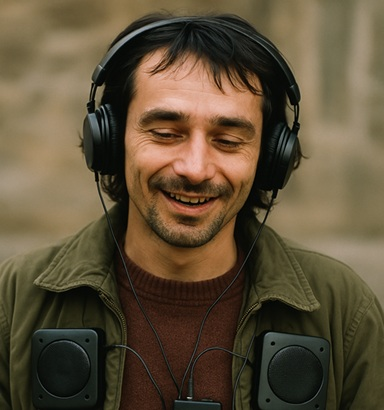

## Evaluation
Submissions are evaluated on the [Root Mean Squared Error (RMSE)](https://www.youtube.com/watch?v=zMFdb__sUpw)

## Initialize Notebook and Load Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Keep important settings/configuration in one place
class Config:
    
    # datasets
    train_path = '/kaggle/input/playground-series-s5e4/train.csv'
    test_path = '/kaggle/input/playground-series-s5e4/test.csv'
    sample_submission_path = '/kaggle/input/playground-series-s5e4/sample_submission.csv'
    #original_data_path = TBD

    target = 'Listening_Time_minutes'
    random_state = 2

In [2]:
# Load Data
train = pd.read_csv(Config.train_path, index_col = 'id')
test = pd.read_csv(Config.test_path, index_col = 'id')
submission = pd.read_csv(Config.sample_submission_path, index_col = 'id')
#original_data = pd.read_csv(Config.original_data_path)

print('train:',train.shape)
print('test:',test.shape)
print('submission', submission.shape)

display(train.head())

train: (750000, 11)
test: (250000, 10)
submission (250000, 1)


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


The dataset contains information about various podcast episodes, aimed at predicting the listening time for each episode. Below is a brief description of each column:

1. **id**: Index.
2. **Podcast_Name**: Name of the podcast series.
3. **Episode_Title**: Title of the specific podcast episode.
4. **Episode_Length_minutes**: Total length of the podcast episode in minutes.
5. **Genre**: Category of the podcast (e.g., True Crime, Comedy, Education).
6. **Host_Popularity_percentage**: Popularity of the podcast host, expressed as a percentage.
7. **Publication_Day**: Day of the week when the episode was published.
8. **Publication_Time**: Time of day when the episode was published.
9. **Guest_Popularity_percentage**: Popularity of the guest featured in the episode, expressed as a percentage. Missing values indicate no guest or unknown popularity.
10. **Number_of_Ads**: Number of advertisements included in the episode.
11. **Episode_Sentiment**: Overall sentiment of the episode content (e.g., Positive, Negative, Neutral).
12. **Listening_Time_minutes**: Actual listening time for the episode in minutes. This is the target variable for predictive modeling.

## Data Completenes

In [3]:
# Count of NaN values per column
nans_train = train.isna().sum()
nans_test = test.isna().sum()

# Only show columns with at least one NaN
display(nans_train[nans_train > 0])
display(nans_test[nans_test > 0])

Episode_Length_minutes          87093
Guest_Popularity_percentage    146030
Number_of_Ads                       1
dtype: int64

Episode_Length_minutes         28736
Guest_Popularity_percentage    48832
dtype: int64

Many missing values in Episode Lenght and Guest Poplularity. Lets find out more information.

<Axes: >

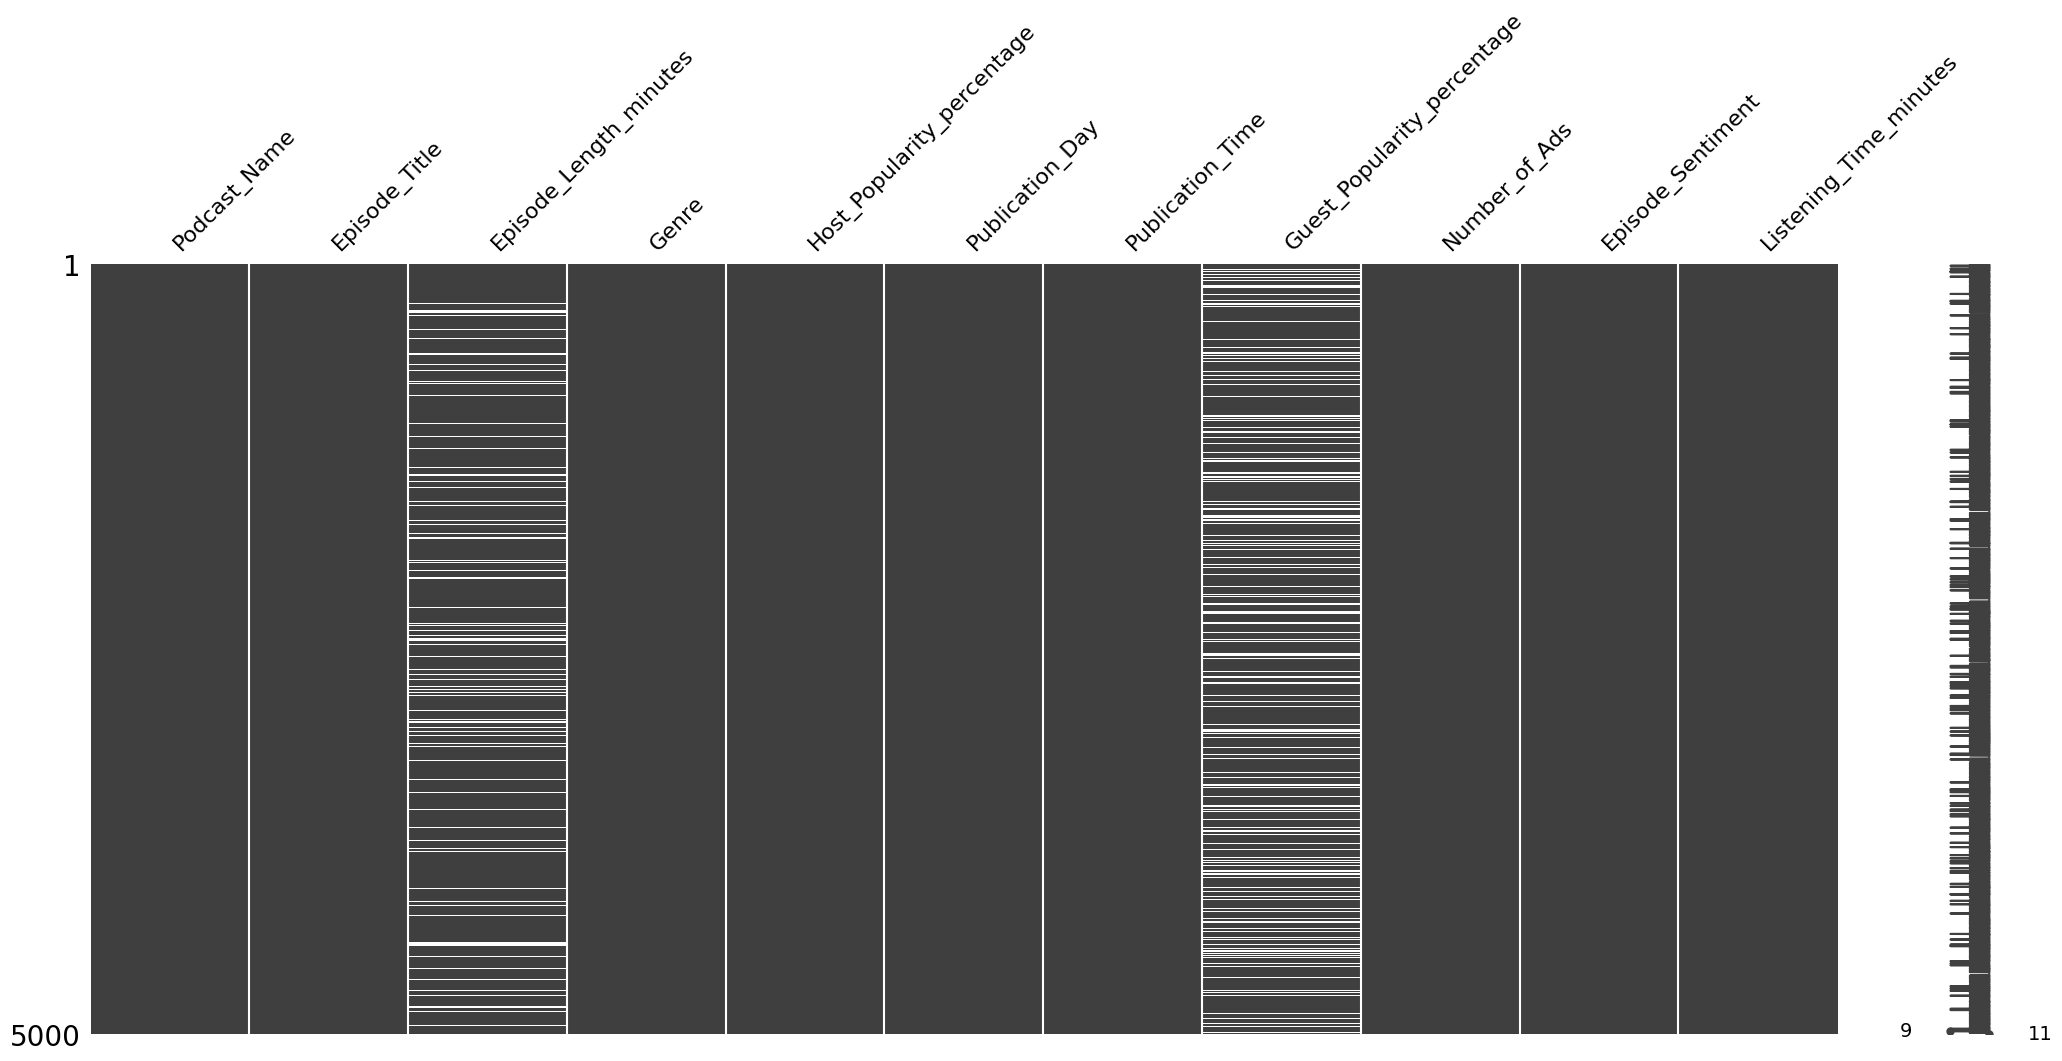

In [4]:
import missingno as msno
msno.matrix(train.sample(5000))

## Distributions and Correlation

In [5]:
#sns.pairplot(train, hue=Config.target, corner=True);

In [6]:
# compare distributions of train and test datasets
